<a href="https://colab.research.google.com/github/RakibHassan11/B10A1/blob/main/ProphetDSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install matplotlib seaborn pandas


In [3]:
import pandas as pd

# Load the dataset from sample_data
file_path = '/content/sample_data/janata.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


                  date trading_code  last_traded_price  high   low  \
0  2010-12-30 00:00:00    1JANATAMF               12.9  13.9  12.3   
1  2010-12-29 00:00:00    1JANATAMF               11.8  12.3  11.2   
2  2010-12-28 00:00:00    1JANATAMF               11.3  11.7  11.0   
3  2010-12-27 00:00:00    1JANATAMF               11.3  11.5  11.0   
4  2010-12-26 00:00:00    1JANATAMF               11.6  11.8  11.2   

   opening_price  closing_price  yesterdays_closing_price  trade  value_mn  \
0           12.3           13.0                      12.0   4708  124.8680   
1           11.7           12.0                      11.3   1680   46.8126   
2           11.0           11.3                      11.2   1077   19.3689   
3           11.5           11.2                      11.4    932   13.9884   
4           11.6           11.4                      11.5   1671   31.8171   

    volume  
0  9623500  
1  3987000  
2  1698500  
3  1249000  
4  2746500  


In [4]:
# Check for null values and basic info
data.info()

# View summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      2918 non-null   object 
 1   trading_code              2918 non-null   object 
 2   last_traded_price         2918 non-null   float64
 3   high                      2918 non-null   float64
 4   low                       2918 non-null   float64
 5   opening_price             2918 non-null   float64
 6   closing_price             2918 non-null   float64
 7   yesterdays_closing_price  2918 non-null   float64
 8   trade                     2918 non-null   int64  
 9   value_mn                  2918 non-null   float64
 10  volume                    2918 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 250.9+ KB
       last_traded_price         high          low  opening_price  \
count        2918.000000  2918.000000  2918.0

In [5]:
# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date']).dt.date

# Display the first few rows to verify
print(data.head())


         date trading_code  last_traded_price  high   low  opening_price  \
0  2010-12-30    1JANATAMF               12.9  13.9  12.3           12.3   
1  2010-12-29    1JANATAMF               11.8  12.3  11.2           11.7   
2  2010-12-28    1JANATAMF               11.3  11.7  11.0           11.0   
3  2010-12-27    1JANATAMF               11.3  11.5  11.0           11.5   
4  2010-12-26    1JANATAMF               11.6  11.8  11.2           11.6   

   closing_price  yesterdays_closing_price  trade  value_mn   volume  
0           13.0                      12.0   4708  124.8680  9623500  
1           12.0                      11.3   1680   46.8126  3987000  
2           11.3                      11.2   1077   19.3689  1698500  
3           11.2                      11.4    932   13.9884  1249000  
4           11.4                      11.5   1671   31.8171  2746500  


In [6]:
# Convert the 'date' column to datetime and remove the time component
data['date'] = pd.to_datetime(data['date']).dt.date


In [7]:
# Drop duplicate rows based on the 'date' column
data = data.drop_duplicates(subset='date')


In [8]:
# Sort the data by the 'date' column in descending order
data = data.sort_values(by='date', ascending=False).reset_index(drop=True)


In [9]:
# Display the processed data
print(data.head())


         date trading_code  last_traded_price  high  low  opening_price  \
0  2022-12-29    1JANATAMF                0.0   0.0  0.0            0.0   
1  2022-12-28    1JANATAMF                6.1   6.1  6.1            6.1   
2  2022-12-27    1JANATAMF                0.0   0.0  0.0            0.0   
3  2022-12-26    1JANATAMF                6.1   6.1  6.1            6.1   
4  2022-12-22    1JANATAMF                6.1   6.1  6.1            6.1   

   closing_price  yesterdays_closing_price  trade  value_mn  volume  
0            6.1                       6.1      0     0.000       0  
1            6.1                       6.1      1     0.001     100  
2            6.1                       6.1      0     0.000       0  
3            6.1                       6.1      3     0.001     205  
4            6.1                       6.1      3     0.000       7  


In [10]:
# Generate a complete range of dates from the earliest to the latest date
full_date_range = pd.date_range(start=data['date'].min(), end=data['date'].max())

# Reindex the data to include all dates
data = data.set_index('date').reindex(full_date_range).reset_index()

# Rename the new index column back to 'date'
data.rename(columns={'index': 'date'}, inplace=True)

# Fill missing values if required
data.fillna(method='ffill', inplace=True)  # Forward fill


<ipython-input-10-68caa09a51a9>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


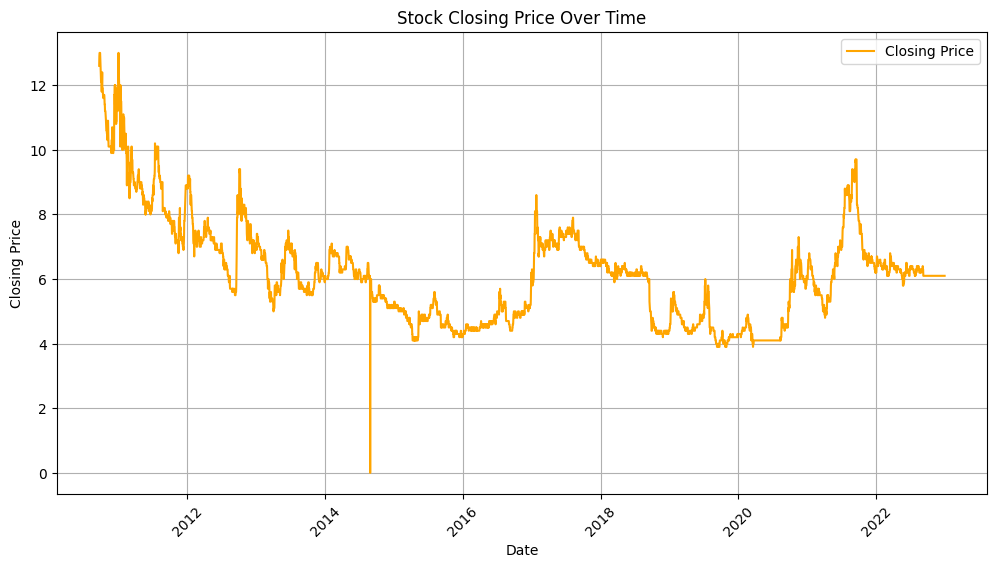

In [12]:
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['closing_price'], label='Closing Price', color='orange')

# Customize the plot
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.show()


         date trading_code  last_traded_price  high   low  opening_price  \
0  2010-12-30    1JANATAMF               12.9  13.9  12.3           12.3   
1  2010-12-29    1JANATAMF               11.8  12.3  11.2           11.7   
2  2010-12-28    1JANATAMF               11.3  11.7  11.0           11.0   
3  2010-12-27    1JANATAMF               11.3  11.5  11.0           11.5   
4  2010-12-26    1JANATAMF               11.6  11.8  11.2           11.6   

   closing_price  yesterdays_closing_price  trade  value_mn   volume  
0           13.0                      12.0   4708  124.8680  9623500  
1           12.0                      11.3   1680   46.8126  3987000  
2           11.3                      11.2   1077   19.3689  1698500  
3           11.2                      11.4    932   13.9884  1249000  
4           11.4                      11.5   1671   31.8171  2746500  


<ipython-input-2-1a8902be5880>:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


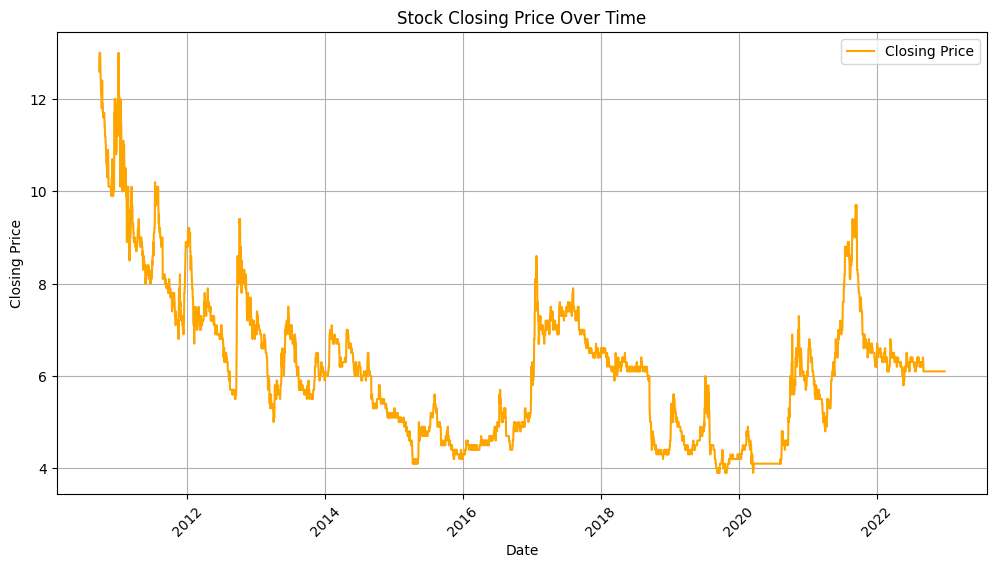

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# prompt: remove rows where closing_price last_traded_price low opening_price yesterdays_closing_price value_mn volume   is zero and download this new dataset. I need plot like this import matplotlib.pyplot as plt
# # Plot closing price over time
# plt.figure(figsize=(12, 6))
# plt.plot(data['date'], data['closing_price'], label='Closing Price', color='orange')
# # Customize the plot
# plt.title('Stock Closing Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend()
# plt.grid()
# # Show the plot
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset from sample_data
file_path = '/content/sample_data/janata.csv'
data = pd.read_csv(file_path)

# Define columns to check for zeros
columns_to_check = ['closing_price', 'last_traded_price', 'low', 'opening_price', 'yesterdays_closing_price', 'value_mn', 'volume']

# Remove rows where any of the specified columns have a value of zero
data = data[~(data[columns_to_check] == 0).any(axis=1)]

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date']).dt.date

# Display the first few rows to verify
print(data.head())

# Convert the 'date' column to datetime and remove the time component
data['date'] = pd.to_datetime(data['date']).dt.date

# Drop duplicate rows based on the 'date' column
data = data.drop_duplicates(subset='date')

# Sort the data by the 'date' column in descending order
data = data.sort_values(by='date', ascending=False).reset_index(drop=True)

# Generate a complete range of dates from the earliest to the latest date
full_date_range = pd.date_range(start=data['date'].min(), end=data['date'].max())

# Reindex the data to include all dates
data = data.set_index('date').reindex(full_date_range).reset_index()

# Rename the new index column back to 'date'
data.rename(columns={'index': 'date'}, inplace=True)

# Fill missing values if required
data.fillna(method='ffill', inplace=True)  # Forward fill


# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['closing_price'], label='Closing Price', color='orange')

# Customize the plot
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Save the cleaned data to a CSV file
data.to_csv('cleaned_data.csv', index=False)

# Download the cleaned dataset
files.download('cleaned_data.csv')

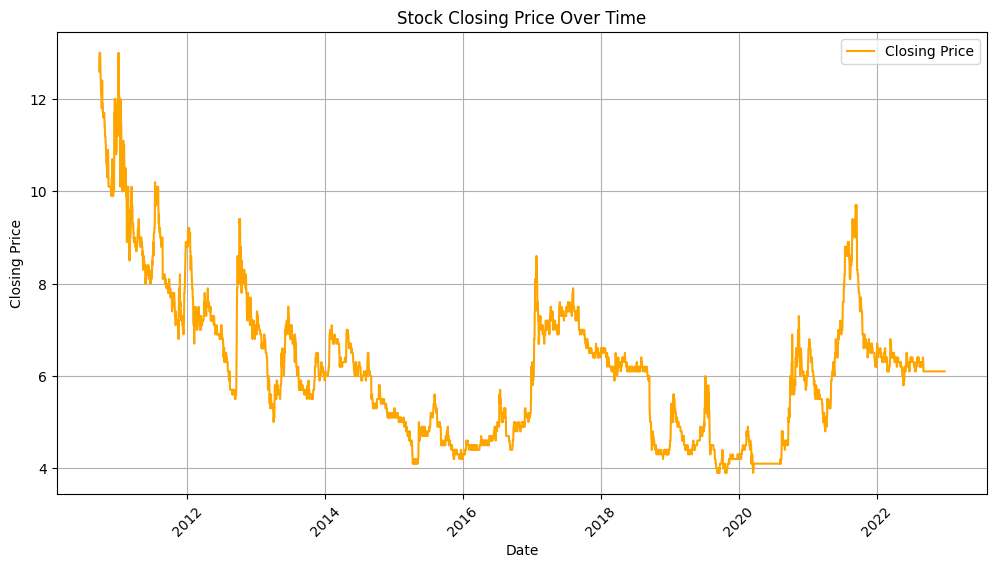

In [3]:
# prompt: import new data set cleaned_janata .plot where x axis data and y axis closing price. i need plot like this import matplotlib.pyplot as plt
# # Plot closing price over time
# plt.figure(figsize=(12, 6))
# plt.plot(data['date'], data['closing_price'], label='Closing Price', color='orange')
# # Customize the plot
# plt.title('Stock Closing Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.legend()
# plt.grid()
# # Show the plot
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset (assuming it's in the same directory or provide the correct path)
try:
  cleaned_data = pd.read_csv('cleaned_data.csv')
except FileNotFoundError:
  print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
  exit() # or handle the error in another way

# Convert 'date' column to datetime objects if it's not already
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['date'], cleaned_data['closing_price'], label='Closing Price', color='orange')

# Customize the plot
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

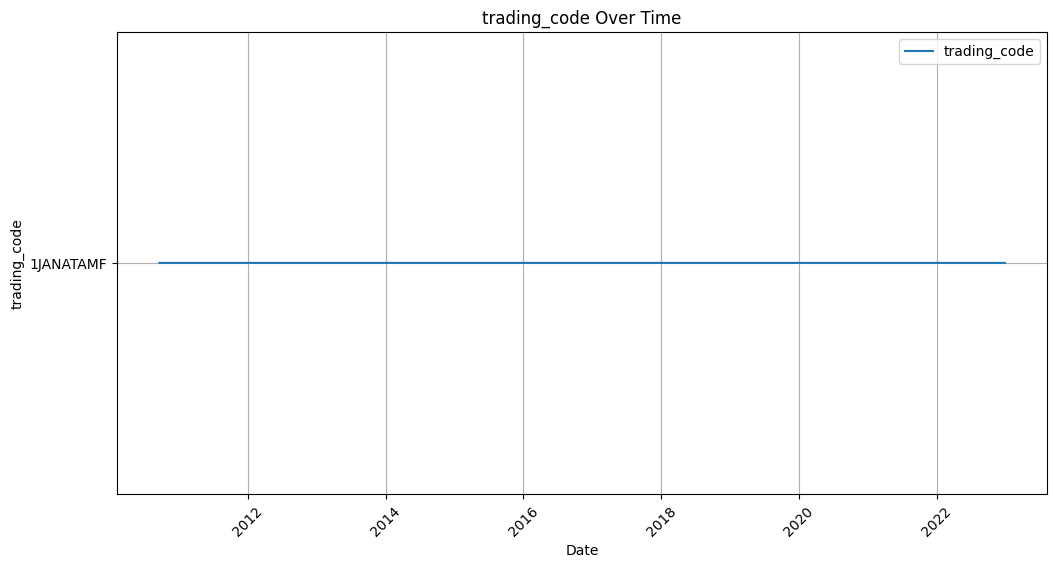

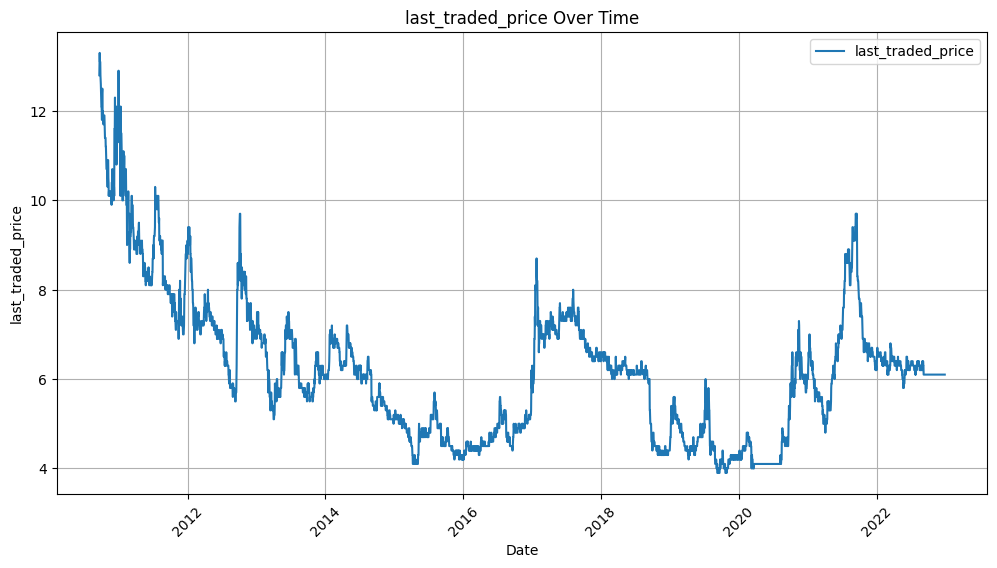

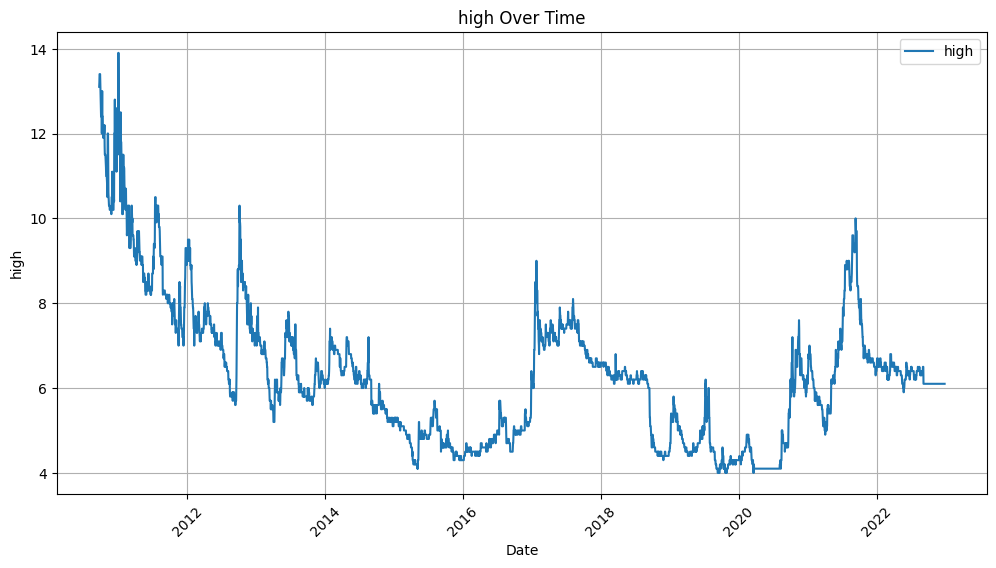

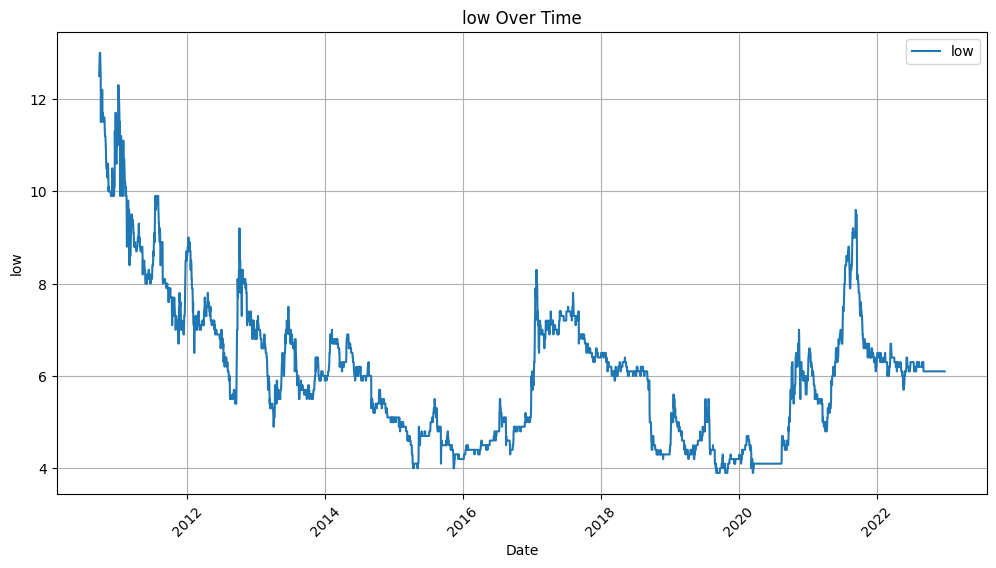

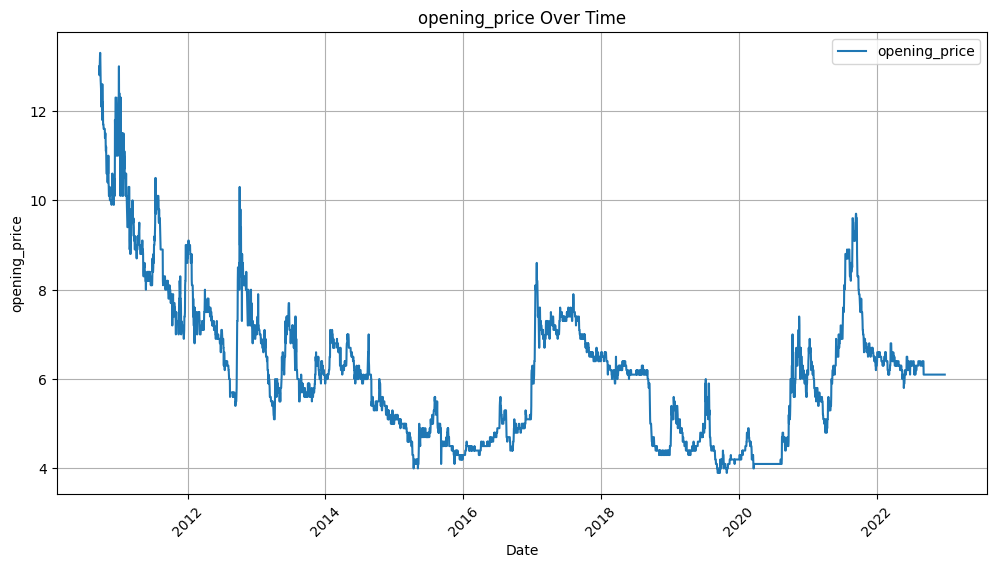

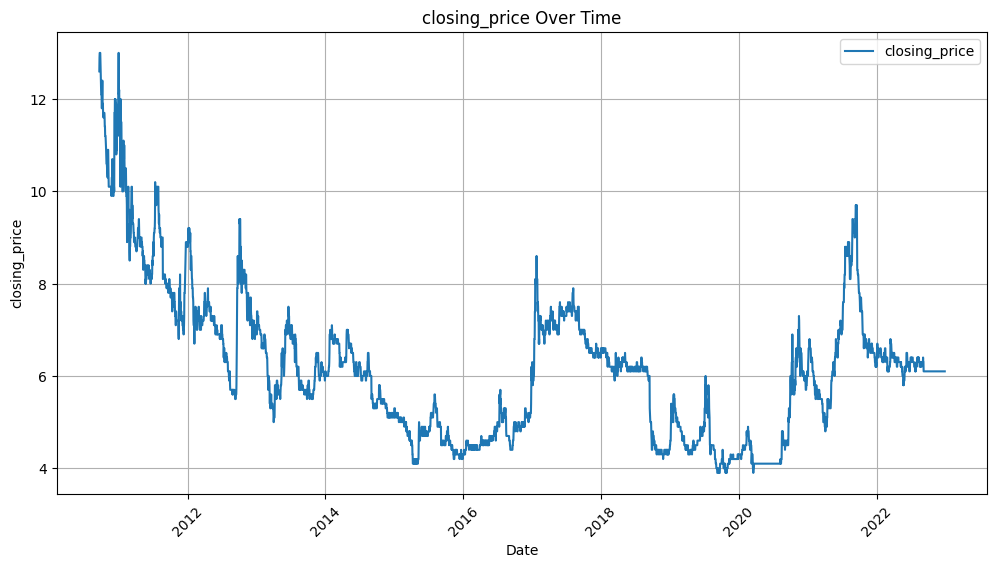

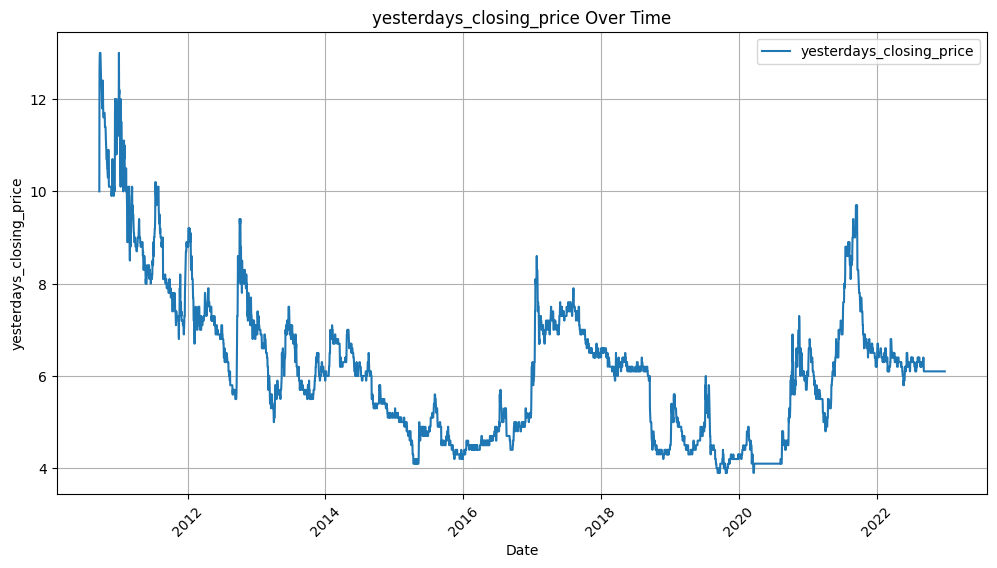

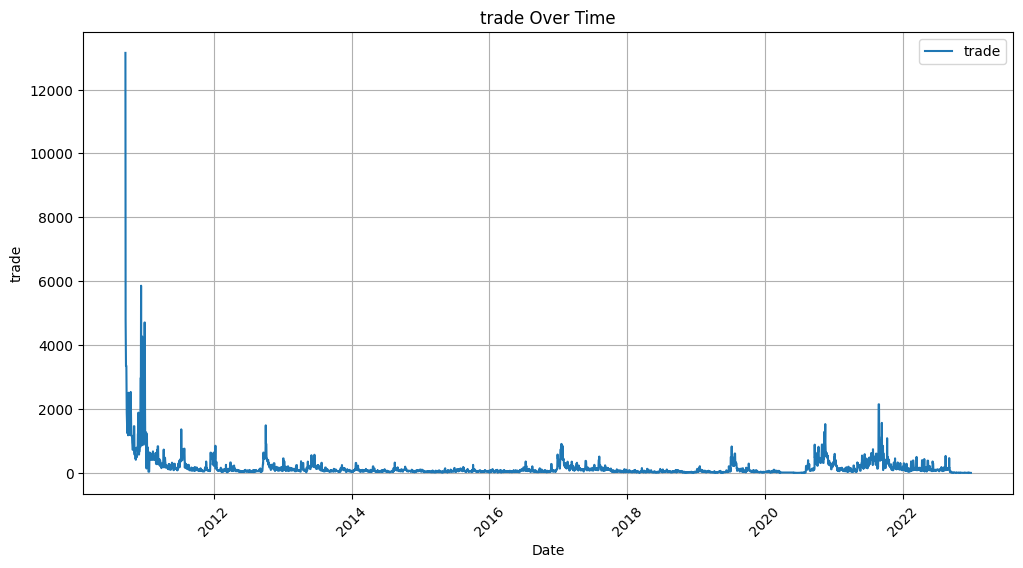

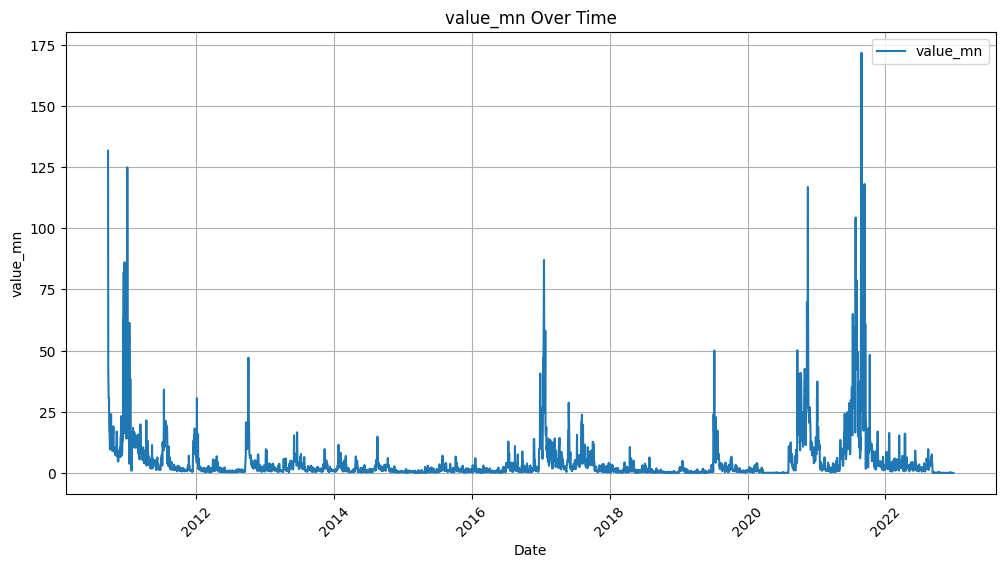

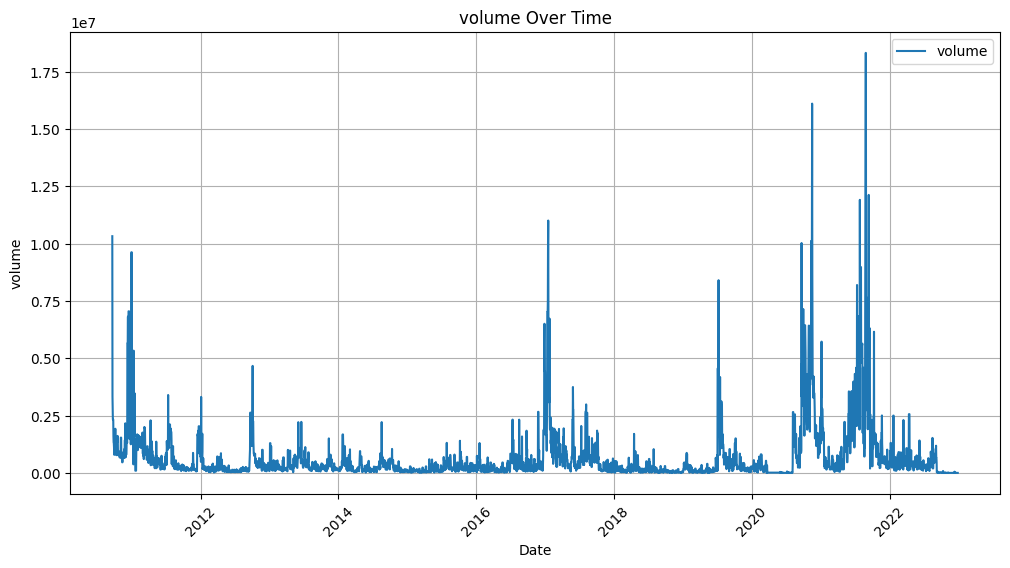

In [4]:
# prompt: now plot for each column individual graph x axis date and y axis will chhange according to the column. like the previous plot

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
try:
    cleaned_data = pd.read_csv('cleaned_data.csv')
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()

# Convert 'date' column to datetime objects if it's not already
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Get a list of columns to plot (excluding 'date')
columns_to_plot = [col for col in cleaned_data.columns if col != 'date']

# Create individual plots for each column
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(cleaned_data['date'], cleaned_data[column], label=column)
    plt.title(f'{column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj090y657/wcak5sqt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj090y657/k181qzhn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47153', 'data', 'file=/tmp/tmpj090y657/wcak5sqt.json', 'init=/tmp/tmpj090y657/k181qzhn.json', 'output', 'file=/tmp/tmpj090y657/prophet_modeldky_29w6/prophet_model-20250124114054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:40:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:40:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


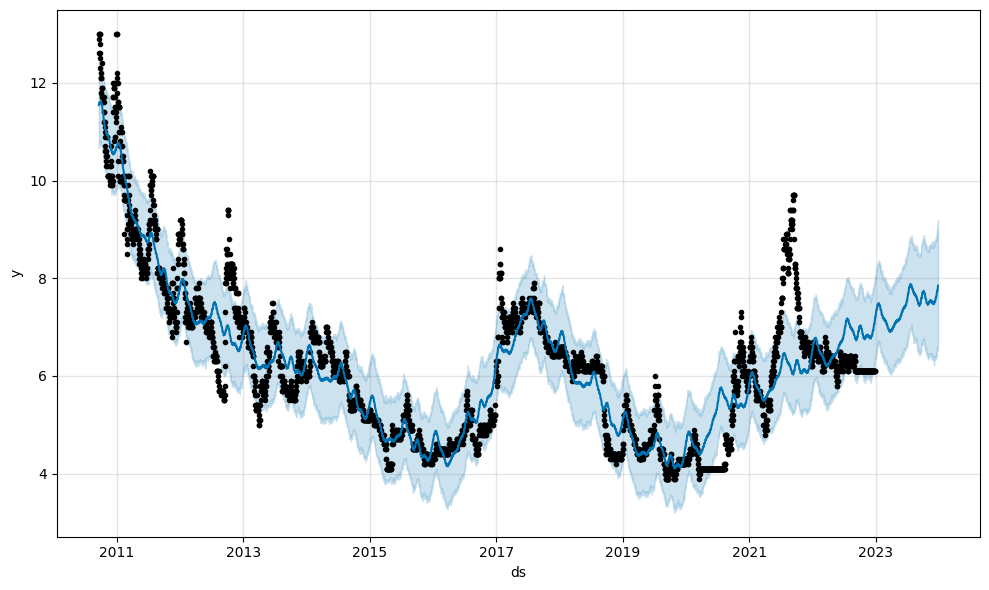

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

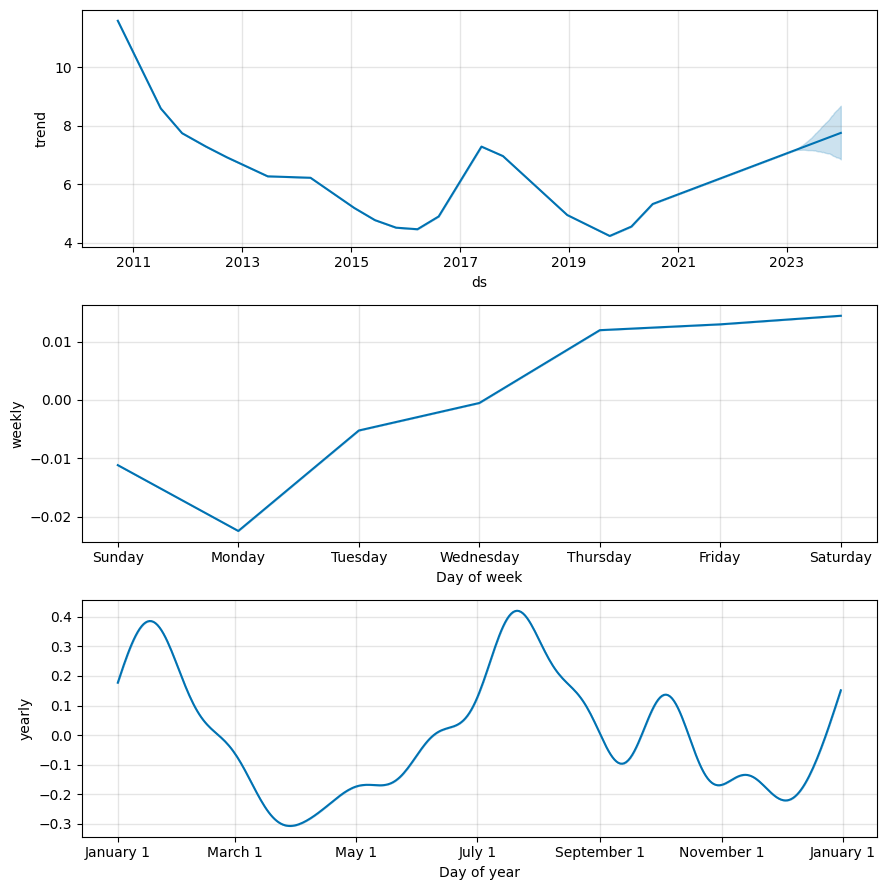

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# prompt: import prophet model .  use the  data to train the model . download all plots

!pip install prophet

from prophet import Prophet

# Load the cleaned dataset
try:
    cleaned_data = pd.read_csv('cleaned_data.csv')
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()

# Convert 'date' column to datetime objects if it's not already
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Prepare the data for Prophet
prophet_data = cleaned_data[['date', 'closing_price']].rename(columns={'date': 'ds', 'closing_price': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make future predictions (e.g., for the next 365 days)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()
fig1.savefig('forecast_plot.png')
files.download('forecast_plot.png')

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()
fig2.savefig('forecast_components.png')
files.download('forecast_components.png')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj090y657/ms0wxi4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj090y657/z3xil937.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88014', 'data', 'file=/tmp/tmpj090y657/ms0wxi4f.json', 'init=/tmp/tmpj090y657/z3xil937.json', 'output', 'file=/tmp/tmpj090y657/prophet_modelybu8j6vm/prophet_model-20250124114123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:41:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prediction plot saved as 'prediction_plot.png'.


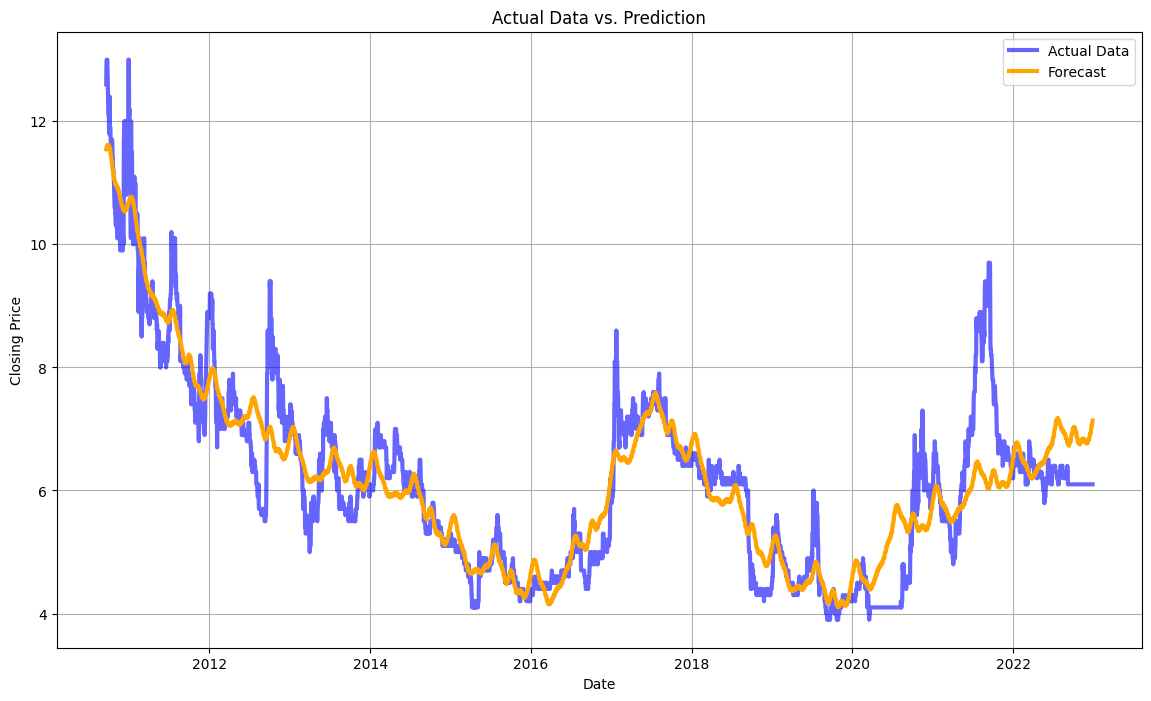

Forecast components plot saved as 'forecast_components.png'.


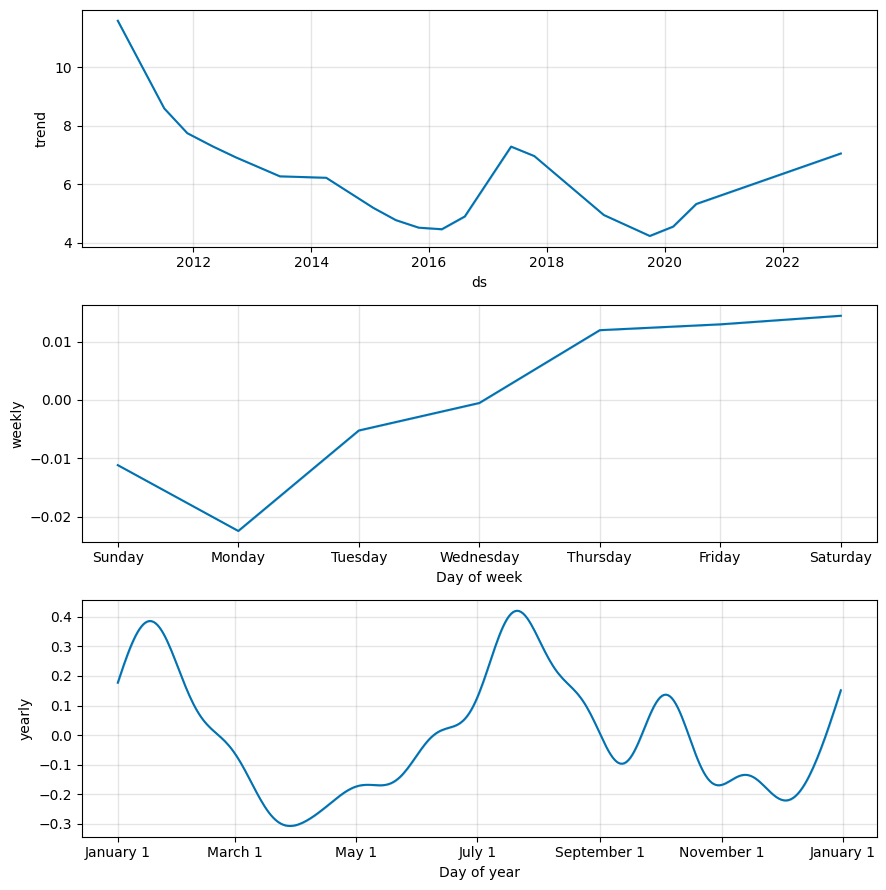

Root Mean Squared Error (RMSE): 0.6479834813444575
Mean Absolute Error (MAE): 0.45888610384795864
R-squared: 0.8360571099426894


In [6]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from google.colab import files

# Load the cleaned dataset
try:
    cleaned_data = pd.read_csv('cleaned_data.csv')
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()

# Convert 'date' column to datetime objects
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Prepare the data for Prophet
prophet_data = cleaned_data[['date', 'closing_price']].rename(columns={'date': 'ds', 'closing_price': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe matching the range of the dataset for predictions
future = prophet_data[['ds']]  # Use only the dates in the dataset
forecast = model.predict(future)

# Plot the actual data and predictions with continuous bold lines
plt.figure(figsize=(14, 8))

# Plot actual data with bold continuous line
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Data', color='blue', alpha=0.6, linewidth=3)

# Plot the forecasted data with bold continuous line
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linewidth=3)

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual Data vs. Prediction')
plt.legend()
plt.grid()

# Save the main plot
plt.savefig('prediction_plot.png', dpi=300, bbox_inches='tight')
print("Prediction plot saved as 'prediction_plot.png'.")
plt.show()

# Download the plot file
# files.download('prediction_plot.png')

# Plot the components of the forecast and save them
components_fig = model.plot_components(forecast)
components_fig.savefig('forecast_components.png', dpi=300, bbox_inches='tight')
print("Forecast components plot saved as 'forecast_components.png'.")
plt.show()

# Download the components plot file
# files.download('forecast_components.png')

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(prophet_data['y'], forecast['yhat']))
mae = mean_absolute_error(prophet_data['y'], forecast['yhat'])
r2 = r2_score(prophet_data['y'], forecast['yhat'])

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


In [7]:
# prompt: calculate accuracy in percentage like 87%

# Assuming 'r2' is the variable holding the R-squared value.
accuracy_percentage = r2 * 100
print(f"Accuracy: {accuracy_percentage:.0f}%") # Output accuracy as a percentage with no decimal places

Accuracy: 84%


In [10]:
import pandas as pd
import mplfinance as mpf

# Load the cleaned dataset
try:
    cleaned_data = pd.read_csv('cleaned_data.csv')
except FileNotFoundError:
    print("Error: 'cleaned_data.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    exit()

# Convert 'date' column to datetime objects
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Prepare the data for Prophet (if you haven't already)
prophet_data = cleaned_data[['date', 'closing_price']].rename(columns={'date': 'ds', 'closing_price': 'y'})

# Create a dataframe matching the range of the dataset for predictions
future = prophet_data[['ds']]
forecast = model.predict(future)

# Update the 'closing_price' column in cleaned_data with predicted values
cleaned_data['closing_price'] = forecast['yhat'].values

# Ensure the dataset is sorted by date
cleaned_data = cleaned_data.sort_values('date')

# Format the data for mplfinance
candlestick_data = cleaned_data.rename(
    columns={
        'date': 'Date',
        'opening_price': 'Open',
        'high': 'High',
        'low': 'Low',
        'closing_price': 'Close',
        'volume': 'Volume',  # Include volume if available
    }
).set_index('Date')

# Plot the candlestick chart
mpf.plot(
    candlestick_data,
    type='candle',               # Candlestick type
    style='yahoo',               # Predefined style (e.g., 'yahoo', 'classic', 'blueskies')
    title='Candlestick Chart with Predicted Closing Prices',
    ylabel='Price',
    volume=True,                 # Show volume if available
    figratio=(16, 9),            # Figure ratio (width x height)
    figscale=1.2,                # Scale of the figure
    savefig='candlestick_chart.png'  # Save the chart as an image
)

print("Candlestick chart saved as 'candlestick_chart.png'.")


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


Candlestick chart saved as 'candlestick_chart.png'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date,Predicted Closing Price
0,2010-09-20,11.544187
1,2010-09-21,11.566279
2,2010-09-22,11.576637
3,2010-09-23,11.595184
4,2010-09-24,11.602360
...,...,...
4478,2022-12-24,7.063839
4479,2022-12-25,7.059499
4480,2022-12-26,7.069855
4481,2022-12-27,7.109014


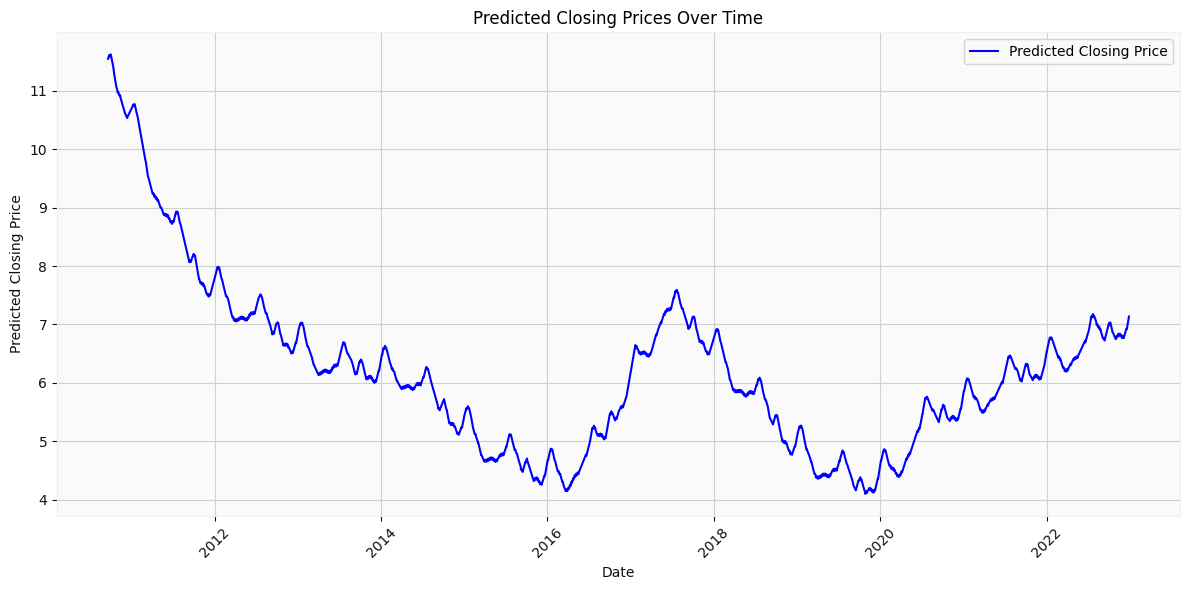

In [15]:
# prompt: prophet predicted closing price dataset. just date and predicted closing price also plot plot date and predicted closingprice. download the plot

# Create a DataFrame with 'ds' (date) and 'yhat' (predicted closing price)
predicted_prices = forecast[['ds', 'yhat']]
predicted_prices = predicted_prices.rename(columns={'ds': 'Date', 'yhat': 'Predicted Closing Price'})

# Plot the predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(predicted_prices['Date'], predicted_prices['Predicted Closing Price'], label='Predicted Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price')
plt.title('Predicted Closing Prices Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Save the plot
plt.savefig('predicted_prices_plot.png')

# Download the plot
files.download('predicted_prices_plot.png')

# Display the DataFrame
predicted_prices